In [ ]:
import pandas as pd
import numpy as np

import io
from google.colab import files

from sklearn.impute import KNNImputer
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,accuracy_score

from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Activation
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from matplotlib import pyplot
plt.style.use('ggplot')
%matplotlib inline  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv ('/content/drive/MyDrive/Colab Notebooks/Data Mining/df_oversampled.csv', encoding= 'unicode_escape')
df

,Unnamed: 0,id,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Swarm_Behaviour
0,0,0,562.050000,-0.620000,-10.700000,-4.330000,0.000000,0.000000,0.000000,0.000000,...,-15.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28,0,0.0
1,1,1,175.660000,-57.090000,2.310000,-2.670000,0.000000,0.000000,0.000000,0.000000,...,-3.480000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0,0.0
2,2,2,200.160000,-320.070000,4.010000,-6.370000,0.000000,0.000000,0.000000,0.000000,...,-9.380000,0.000000,0.000000,0.000000,0.000000,-0.110000,-0.300000,15,1,0.0
3,3,3,316.990000,-906.840000,0.850000,9.170000,-0.170000,1.030000,0.000000,0.000000,...,10.390000,-0.260000,1.010000,0.000000,0.000000,0.000000,0.000000,16,0,0.0
4,4,4,1277.680000,908.540000,-2.020000,8.230000,-1.000000,1.000000,0.000000,0.000000,...,13.910000,-1.000000,0.000000,3.210000,15.670000,0.000000,0.000000,12,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30763,30763,30763,1072.042150,-841.413304,-10.189097,-0.359142,0.260000,-0.970000,-3.785005,-0.779506,...,3.626746,0.224649,-0.968838,-3.605386,1.564205,1.181257,2.269662,59,6,1.0
30764,30764,30764,1112.434562,-839.921080,-14.295307,-1.163190,0.209297,-0.977243,-2.920591,-0.877350,...,-0.986379,0.140000,-0.990000,-2.449891,-2.297028,-0.084271,2.654487,60,7,1.0
30765,30765,30765,16.755667,386.290299,-0.447627,9.850531,-0.057482,1.040000,0.000000,0.000000,...,8.180000,0.020000,1.040000,0.000000,0.000000,0.000000,0.000000,16,0,1.0
30766,30766,30766,18.260466,352.510744,-0.464570,10.540198,-0.057086,1.040000,0.000000,0.000000,...,7.761920,-0.015430,1.040000,0.000000,0.000000,0.000000,0.000000,16,0,1.0


In [ ]:
df.isnull().sum()

Unnamed: 0         0
id                 0
x1                 0
y1                 0
xVel1              0
                  ..
xC200              0
yC200              0
nAC200             0
nS200              0
Swarm_Behaviour    0
Length: 2403, dtype: int64

In [ ]:
df.describe()

,Unnamed: 0,id,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Swarm_Behaviour
count,30768.000000,30768.000000,30768.000000,30768.000000,30768.000000,30768.000000,30768.000000,30768.000000,30768.000000,30768.000000,...,30768.000000,30768.000000,30768.000000,30768.000000,30768.000000,30768.000000,30768.000000,30768.000000,30768.000000,30768.000000
mean,15383.500000,15383.500000,89.669239,-127.892076,-0.735053,0.948690,-0.124574,0.214056,-0.877156,-0.479229,...,0.838126,-0.082416,0.182778,-1.218061,-0.106562,0.052063,0.078388,35.006988,3.789262,0.500943
std,8882.100878,8882.100878,790.142678,569.831893,6.239196,7.440642,0.382408,0.602701,23.452567,18.347831,...,7.618378,0.404872,0.585385,64.357496,6.283457,0.748641,0.769845,39.804114,10.071180,0.500007
min,0.000000,0.000000,-1414.140000,-1012.180000,-18.590000,-18.410000,-1.000000,-1.000000,-944.070000,-847.910000,...,-18.440000,-1.040000,-1.000000,-4079.230000,-370.240000,-2.680000,-2.680000,0.000000,0.000000,0.000000
25%,7691.750000,7691.750000,-488.052135,-658.821523,-4.640000,-4.721394,-0.191589,0.000000,0.000000,0.000000,...,-4.760214,-0.170000,0.000000,0.000000,0.000000,-0.090000,-0.020000,4.000000,0.000000,0.000000
50%,15383.500000,15383.500000,75.625461,-229.542152,-0.500000,0.270000,0.000000,0.000000,0.000000,0.000000,...,0.280000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,1.000000
75%,23075.250000,23075.250000,821.575000,356.937912,3.190000,7.870000,0.000000,0.990000,0.000000,0.000000,...,7.950000,0.000000,0.894872,0.000000,0.000000,0.000000,0.070000,59.000000,2.000000,1.000000
max,30767.000000,30767.000000,1406.080000,1015.800000,18.470000,18.570000,1.000000,1.040000,68.560000,234.740000,...,18.490000,1.000000,1.040000,255.990000,57.840000,2.680000,2.680000,142.000000,64.000000,1.000000


In [ ]:
x = df.drop(columns = ["Swarm_Behaviour","id","Unnamed: 0"])
y = df[["Swarm_Behaviour"]]

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 99)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((24614, 2400), (6154, 2400), (24614, 1), (6154, 1))

In [ ]:
x_train = np.array(x_train).reshape((x_train.shape[0], 1, x_train.shape[1]))
x_test = np.array(x_test).reshape((x_test.shape[0], 1, x_test.shape[1]))
print(x_train.shape, y_train.shape, x_train.shape, y_test.shape)

(24614, 1, 2400) (24614, 1) (24614, 1, 2400) (6154, 1)


Epoch 1/50
342/342 - 12s - loss: 0.2831 - accuracy: 0.8300 - val_loss: 0.1674 - val_accuracy: 0.9028 - 12s/epoch - 35ms/step
Epoch 2/50
342/342 - 3s - loss: 0.1311 - accuracy: 0.9146 - val_loss: 0.1078 - val_accuracy: 0.9227 - 3s/epoch - 9ms/step
Epoch 3/50
342/342 - 4s - loss: 0.0975 - accuracy: 0.9222 - val_loss: 0.0890 - val_accuracy: 0.9243 - 4s/epoch - 10ms/step
Epoch 4/50
342/342 - 3s - loss: 0.0855 - accuracy: 0.9245 - val_loss: 0.0822 - val_accuracy: 0.9256 - 3s/epoch - 9ms/step
Epoch 5/50
342/342 - 3s - loss: 0.0811 - accuracy: 0.9246 - val_loss: 0.0792 - val_accuracy: 0.9256 - 3s/epoch - 10ms/step
Epoch 6/50
342/342 - 4s - loss: 0.0792 - accuracy: 0.9245 - val_loss: 0.0780 - val_accuracy: 0.9253 - 4s/epoch - 11ms/step
Epoch 7/50
342/342 - 4s - loss: 0.0777 - accuracy: 0.9249 - val_loss: 0.0766 - val_accuracy: 0.9254 - 4s/epoch - 11ms/step
Epoch 8/50
342/342 - 4s - loss: 0.0766 - accuracy: 0.9253 - val_loss: 0.0758 - val_accuracy: 0.9261 - 4s/epoch - 11ms/step
Epoch 9/50
342/3

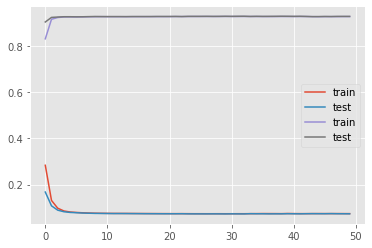

In [ ]:
model = Sequential()
model.add(LSTM(50, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam',metrics=['accuracy'])
# fit network
history = model.fit(x_train, y_train, epochs=50, batch_size=72, validation_data=(x_test, y_test), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()